In [1]:
%matplotlib inline
from path import path

# Clang bootstrap

/usr/lib/pymodules/python2.7/pygraphviz/agraph.py:1281: RuntimeWarning: Warning: k is not a known color.

  warnings.warn("".join(errors),RuntimeWarning)


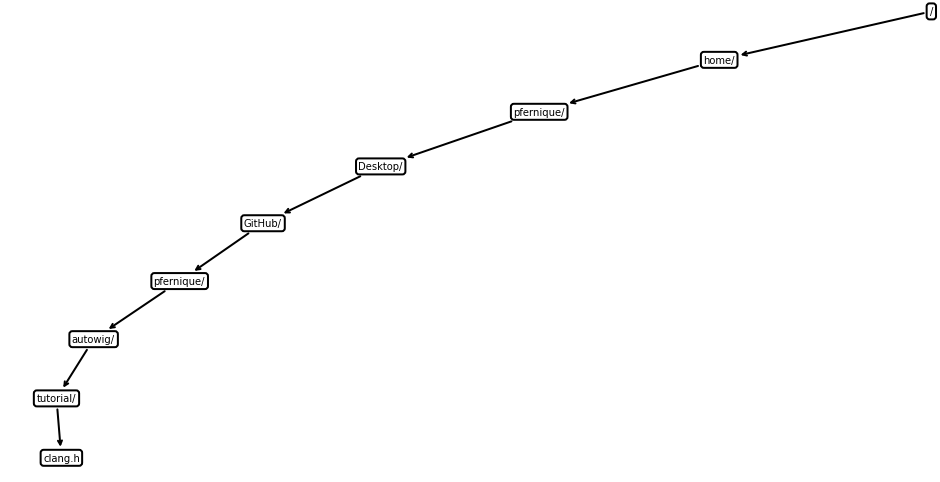

In [2]:
from vplants.autowig.asg import *
asg = AbstractSemanticGraph()
filenode = asg.add_file('./clang.h', language='c++')
filenode.content = """#include <clang/AST/ExternalASTSource.h>
#include <clang/AST/DependentDiagnostic.h>
#include <clang/AST/ParentMap.h>
#include <clang/AST/DeclGroup.h>
#include <clang/AST/DeclAccessPair.h>
#include <clang/AST/UnresolvedSet.h>
#include <clang/AST/DeclarationName.h>
#include <clang/AST/Stmt.h>
#include <clang/AST/Redeclarable.h>
#include <clang/AST/Type.h>
#include <clang/AST/SelectorLocationsKind.h>
#include <clang/AST/ExprObjC.h>
#include <clang/AST/OperationKinds.h>
#include <clang/AST/DeclObjC.h>
#include <clang/AST/CXXInheritance.h>
#include <clang/AST/CommentLexer.h>
#include <clang/AST/ASTTypeTraits.h>
#include <clang/AST/TemplateBase.h>
#include <clang/AST/DeclFriend.h>
#include <clang/AST/OpenMPClause.h>
#include <clang/AST/DeclLookups.h>
#include <clang/AST/StmtVisitor.h>
#include <clang/AST/VTableBuilder.h>
#include <clang/AST/ASTUnresolvedSet.h>
#include <clang/AST/GlobalDecl.h>
#include <clang/AST/DeclBase.h>
#include <clang/AST/ASTContext.h>
#include <clang/AST/CharUnits.h>
#include <clang/AST/StmtOpenMP.h>
#include <clang/AST/TypeLocVisitor.h>
#include <clang/AST/LambdaCapture.h>
#include <clang/AST/CanonicalType.h>
#include <clang/AST/PrettyPrinter.h>
#include <clang/AST/CommentCommandTraits.h>
#include <clang/AST/NestedNameSpecifier.h>
#include <clang/AST/DeclTemplate.h>
#include <clang/AST/Mangle.h>
#include <clang/AST/StmtIterator.h>
#include <clang/AST/Attr.h>
#include <clang/AST/StmtGraphTraits.h>
#include <clang/AST/MangleNumberingContext.h>
#include <clang/AST/StmtCXX.h>
#include <clang/AST/CommentSema.h>
#include <clang/AST/RecursiveASTVisitor.h>
#include <clang/AST/ASTConsumer.h>
#include <clang/AST/ASTFwd.h>
#include <clang/AST/TypeLoc.h>
#include <clang/AST/CommentDiagnostic.h>
#include <clang/AST/VTTBuilder.h>
#include <clang/AST/EvaluatedExprVisitor.h>
#include <clang/AST/CommentParser.h>
#include <clang/AST/AttrIterator.h>
#include <clang/AST/DataRecursiveASTVisitor.h>
#include <clang/AST/NSAPI.h>
#include <clang/AST/TypeOrdering.h>
#include <clang/AST/TypeVisitor.h>
#include <clang/AST/Decl.h>
#include <clang/AST/ExprCXX.h>
#include <clang/AST/CommentVisitor.h>
#include <clang/AST/ASTDiagnostic.h>
#include <clang/AST/AST.h>
#include <clang/AST/ASTLambda.h>
#include <clang/AST/StmtObjC.h>
#include <clang/AST/RecordLayout.h>
#include <clang/AST/APValue.h>
#include <clang/AST/DeclContextInternals.h>
#include <clang/AST/TemplateName.h>
#include <clang/AST/ASTImporter.h>
#include <clang/AST/DeclOpenMP.h>
#include <clang/AST/ASTMutationListener.h>
#include <clang/AST/RawCommentList.h>
#include <clang/AST/ASTVector.h>
#include <clang/AST/Comment.h>
#include <clang/AST/DeclCXX.h>
#include <clang/AST/CommentBriefParser.h>
#include <clang/AST/Expr.h>
#include <clang/AST/BaseSubobject.h>
#include <clang/AST/DeclVisitor.h>
#include <clang/Frontend/ASTUnit.h>"""
asg

In [3]:
flags = ['-x', 'c++', '-g', '-std=c++11', '-I/usr/local/include']
filenode.parse(flags=flags, libclang=True)

/home/pfernique/Desktop/GitHub/pfernique/autowig/src/vplants/autowig/asg.py:1457: UserWarning: Typedef interpretation failed for '::std::size_t'
  warnings.warn('Typedef interpretation failed for \'' + spelling + '\'')
/home/pfernique/Desktop/GitHub/pfernique/autowig/src/vplants/autowig/asg.py:1457: UserWarning: Typedef interpretation failed for '::std::ptrdiff_t'
  warnings.warn('Typedef interpretation failed for \'' + spelling + '\'')
/home/pfernique/Desktop/GitHub/pfernique/autowig/src/vplants/autowig/asg.py:1502: UserWarning: Typedef interpretation failed for '::std::nullptr_t'
  warnings.warn('Typedef interpretation failed for \'' + spelling + '\'')
/home/pfernique/Desktop/GitHub/pfernique/autowig/src/vplants/autowig/asg.py:1751: UserWarning: Class template specialization not read
  warnings.warn('Class template specialization not read')
/home/pfernique/Desktop/GitHub/pfernique/autowig/src/vplants/autowig/asg.py:1628: UserWarning: 'list' object has no attribute 'id'
  warnings.war

In [4]:
len(asg)

35939

In [5]:
#flags = ['-x', 'c++', '-g', '-std=c++11', '-I/usr/local/include']
#filenode.parse(flags=flags, libclang=True)

from vplants.autowig.asg import FunctionProxy

for node in asg.nodes():
    node.clean = True

asg['::clang::ASTUnit'].clean = False
    
for node in asg['::clang::([a-zA-Z]*(Decl|Type)|DeclContext)$']:
    node.clean = False
    
asg['::clang::AccessSpecifier'].clean = False

asg['::clang::CXXBaseSpecifier'].clean = False
asg['::clang::CXXBaseSpecifier::getAccessSpecifier'].pop().clean = False
asg['::clang::CXXBaseSpecifier::getType'].pop().clean = False

asg._nodes[asg['::clang::QualType'].id]['is_abstract'] = False
asg._nodes[asg['::clang::QualType'].id]['is_copyable'] = True
asg['::clang::QualType::isConstQualified'].pop().clean = False
asg['::clang::QualType::isVolatileQualified'].pop().clean = False
asg['::clang::QualType::getTypePtrOrNull'].pop().clean = False

asg['::clang::Type::isBuiltinType'].pop().clean = False
asg['::clang::Type::isSpecificBuiltinType'].pop().clean = False
asg['::clang::Type::isPointerType'].pop().clean = False
asg['::clang::Type::isLValueReferenceType'].pop().clean = False 
asg['::clang::Type::isRValueReferenceType'].pop().clean = False
asg['::clang::Type::getPointeeType'].pop().clean = False
asg['::clang::Type::isStructureOrClassType'].pop().clean = False
asg['::clang::Type::isEnumeralType'].pop().clean = False
asg['::clang::Type::isUnionType'].pop().clean = False
asg['::clang::Type::getAsTagDecl'].pop().clean = False
asg['::clang::Type::TypeClass'].clean = False
asg['::clang::Type::getTypeClass'].pop().clean = False

asg['::clang::Decl::getAccess'].pop().clean = False

asg['::clang::LinkageSpecDecl::getLanguage'].pop().clean = False
asg['::clang::LinkageSpecDecl::LanguageIDs'].clean = False

asg['::clang::ValueDecl::getType'].pop().clean = False

asg['::clang::FieldDecl::isMutable'].pop().clean = False

asg['::clang::FunctionDecl::getNumParams'].pop().clean = False
for function in asg['::clang::FunctionDecl::getParamDecl']:
    if isinstance(function, FunctionProxy) and function.result_type.globalname == '::clang::ParmVarDecl const *':
        function.clean = False
        asg._nodes[function.id]['_is_overloaded'] = True
        asg._nodes[function.id]['is_const'] = True
        break
asg['::clang::FunctionDecl::getReturnType'].pop().clean = False

asg['::clang::CXXMethodDecl::isStatic'].pop().clean = False
asg['::clang::CXXMethodDecl::isConst'].pop().clean = False
asg['::clang::CXXMethodDecl::isVolatile'].pop().clean = False
asg['::clang::CXXMethodDecl::isVirtual'].pop().clean = False

asg['::clang::CXXRecordDecl::isAbstract'].pop().clean = False
asg['::clang::CXXRecordDecl::getNumBases'].pop().clean = False
asg['::clang::CXXRecordDecl::getNumVBases'].pop().clean = False

for enum in asg.enums():
    if not enum.clean:
        for constant in enum.constants:
            constant.clean = False

In [6]:
print 'Before cleaning:', len(asg)
asg.clean()
print 'After  cleaning:', len(asg)

Before cleaning: 35939
After  cleaning: 309


In [ ]:
from vplants.autowig.boost_python import *
import re

def include(header):
    return '<' + re.sub('(.*)include/(.*)', r'\2', header.globalname) + '>'
    
module = asg.boost_python_module('../src/boost_python/autowig.cpp', '::(.*)', include=include)

In [ ]:
filenode = asg.add_file('../src/boost_python/export_functions_clang_tooling.cpp')
filenode.is_protected = False
filenode.content = """#include <boost/python.hpp>
#include <clang/Frontend/ASTUnit.h>
#include <clang/Tooling/Tooling.h>
#include <clang/AST/Decl.h>
#include <clang/AST/DeclTemplate.h>
#include <clang/AST/Type.h>
#include <clang/AST/PrettyPrinter.h>
#include <llvm/Support/raw_ostream.h>

namespace autowig
{
    clang::ASTUnit* build_ast_from_code_with_args(const std::string& _code, boost::python::object _args)
    {
        std::vector< std::string > args(boost::python::len(_args));
        for(unsigned int i = 0; i < args.size(); ++i)
        { args[i] = boost::python::extract< std::string >(_args[i]); }
        llvm::Twine code(_code);
        return clang::tooling::buildASTFromCodeWithArgs(code, args).release(); 
    }
    
    unsigned int ast_get_nb_children(clang::ASTUnit& ast)
    {
        unsigned int nb = 0;
        for(auto it = ast.top_level_begin(); it != ast.top_level_end(); ++it)
        { ++nb; }
        return nb;
    }
      
    unsigned int tcls_get_nb_children(const clang::ClassTemplateDecl& cls)
    {
        unsigned int nb = 0;
        for(auto it = cls.spec_begin(); it != cls.spec_end(); ++it)
        { ++nb; }
        return nb;
    }
    
    unsigned int decl_get_nb_children(clang::DeclContext& decl)
    {
        unsigned int nb = 0;
        for(auto it = decl.decls_begin(); it != decl.decls_end(); ++it)
        { ++nb; }
        return nb;
    }
    
    clang::Decl* ast_get_child(clang::ASTUnit& ast, const unsigned int& child)
    {
        auto it = ast.top_level_begin();
        for(unsigned int i = 0; i < child; ++i)
        { ++it; }
        return *it;
    }
    
    clang::Decl* decl_get_child(const clang::DeclContext& decl, const unsigned int& child)
    {
        auto it = decl.decls_begin();
        for(unsigned int i = 0; i < child; ++i)
        { ++it; }
        return *it;
    }
        
    clang::Decl* tcls_get_child(const clang::ClassTemplateDecl& cls, const unsigned int& child)
    {
        auto it = cls.spec_begin();
        for(unsigned int i = 0; i < child; ++i)
        { ++it; }
        return *it;
    }
    
    std::string (clang::QualType::*get_as_string)() const = &clang::QualType::getAsString;
    
    clang::NamespaceDecl * decl_cast_as_namespace(clang::DeclContext * decl)
    { return static_cast< clang::NamespaceDecl * >(decl); }
    
    clang::RecordDecl * decl_cast_as_record(clang::DeclContext * decl)
    { return static_cast< clang::RecordDecl * >(decl); }
    
    std::string decl_spelling(const clang::NamedDecl& decl)
    {
        std::string spelling = "";
        llvm::raw_string_ostream os(spelling);
        clang::LangOptions lang;
        lang.CPlusPlus = true;
        clang::PrintingPolicy policy(lang);
        policy.SuppressScope = false;
        decl.getNameForDiagnostic(os, policy, true);
        return os.str();
    }cursor
    
    bool cxxrecord_is_copyable(const clang::CXXRecordDecl& decl)
    {
        bool res = false;
        auto it = decl.ctor_begin();
        while(!res && it != decl.ctor_end())
        {
            res = (*it)->isCopyConstructor();
            ++it;
        }
        return res;
    }
    
    clang::CXXBaseSpecifier const * cxxrecord_get_base(const clang::CXXRecordDecl& decl, const unsigned int& base)
    {
        auto it = decl.bases_begin();
        for(unsigned int i = 0; i < base; ++i)
        { ++it; }
        return *it;
    }
    
    clang::CXXBaseSpecifier const * cxxrecord_get_virtual_base(const clang::CXXRecordDecl& decl, const unsigned int& base)
    {
        auto it = decl.vbases_begin();
        for(unsigned int i = 0; i < base; ++i)
        { ++it; }
        return *it;
    }
    
    std::string decl_get_filename(const Decl& decl)
    { return decl.getASTContext().getSourceManager().getFilename(decl).str(); }
}

void export_functions_clang_tooling()
{
    std::string clang_name = boost::python::extract< std::string >(boost::python::scope().attr("__name__") + ".clang");
    boost::python::object clang_module(boost::python::handle<  >(boost::python::borrowed(PyImport_AddModule(clang_name.c_str()))));
    boost::python::scope().attr("clang") = clang_module;
    boost::python::scope clang_scope = clang_module;
    std::string tooling_name = boost::python::extract< std::string >(boost::python::scope().attr("__name__") + ".tooling");
    boost::python::object tooling_module(boost::python::handle<  >(boost::python::borrowed(PyImport_AddModule(tooling_name.c_str()))));
    boost::python::scope().attr("tooling") = tooling_module;
    boost::python::scope tooling_scope = tooling_module;
    boost::python::def("build_ast_from_code_with_args", ::autowig::build_ast_from_code_with_args, boost::python::return_value_policy< boost::python::reference_existing_object >());
    boost::python::def("get_name", &::clang::NamedDecl::getNameAsString);
    boost::python::def("ast_get_nb_children", ::autowig::ast_get_nb_children);
    boost::python::def("decl_get_nb_children", ::autowig::decl_get_nb_children);
    boost::python::def("tcls_get_nb_children", ::autowig::tcls_get_nb_children);
    boost::python::def("ast_get_child", ::autowig::ast_get_child, boost::python::return_value_policy< boost::python::reference_existing_object >());
    boost::python::def("decl_get_child", ::autowig::decl_get_child, boost::python::return_value_policy< boost::python::reference_existing_object >());
    boost::python::def("tcls_get_child", ::autowig::tcls_get_child, boost::python::return_value_policy< boost::python::reference_existing_object >());
    boost::python::def("get_as_string", ::autowig::get_as_string);
    boost::python::def("decl_cast_as_namespace", ::autowig::decl_cast_as_namespace, boost::python::return_value_policy< boost::python::reference_existing_object >());
    boost::python::def("decl_cast_as_record", ::autowig::decl_cast_as_record, boost::python::return_value_policy< boost::python::reference_existing_object >());
    boost::python::def("decl_spelling", ::autowig::decl_spelling);
    boost::python::def("cxxrecord_is_copyable", ::autowig::cxxrecord_is_copyable);
    boost::python::def("cxxrecord_get_base", ::autowig::cxxrecord_get_base);
    boost::python::def("cxxrecord_get_virtual_base", ::autowig::cxxrecord_get_virtual_base);
    boost::python::def("decl_get_filename", ::autowig::decl_get_filename);

}"""
filenode.write()
module.add_functions(filenode.globalname)

In [ ]:
asg.write()
from vplants.autowig.scons import *
asg.add_sconscript('../')
asg.scons()

In [ ]:
raise

In [ ]:
asg = AbstractSemanticGraph()
filenode = asg.add_file('./example.cpp', language='c++')
filenode.content="""
template<typename TData>
class Foo
{
public:
  typedef Foo Self;
  typedef TData Data;
  Foo();
  // just a comment
  Data getData(int i, char const* s);
private:
  /// my precious data
  Data m_data;
};

typedef Foo<int> IntFoo;
"""

In [ ]:

content="""
namespace Foo
{
    template<typename TData>
    class Foo
    {
        public:
            typedef Foo<TData> Self;
            typedef TData Data;
            
            Foo();
            // just a comment
            Data getData(int i, char const* s);
            
        private:
            /// my precious data
            Data m_data;
    };
    
    typedef Foo<int> IntFoo;

    class BarBase {
        public:
            BarBase();
    };
    class BarDerived : public BarBase {};
}

using namespace Foo;

//IntFoo bar = IntFoo();
"""
    
from vplants.autowig import autowig
ast = autowig.clang.tooling.build_ast_from_code_with_args(content, ['-x', 'c++', '-g', '-std=c++11'])
    
def flatten(decl, decls):
    decls.append(decl)
    if hasattr(decl, 'get_children'):
        for child in decl.get_children():
            flatten(child, decls)
    
decls = []
flatten(ast, decls)
decls

In [ ]:
ast.get_children()